In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ruamel.yaml as yaml

from maxent_gan.utils.general_utils import ROOT_DIR, DotConfig


In [3]:
sns.set_theme()

In [4]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('lines', linewidth=3)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
def plot_res(log_path, config, arange):

    try:
        is_values = np.loadtxt(Path(log_path, 'is_values.txt'))[:, 0]
        fig = plt.figure()
        plt.plot(np.arange(len(is_values))*arange[1], is_values)
        plt.xlabel('Iteration')
        plt.ylabel('IS')
        plt.title('Inception Score')
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_is.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_is.pdf'))
        plt.close()
    except:
        print('is failed')

    try:
        fid_values = np.loadtxt(Path(log_path, 'fid_values.txt'))
        fig = plt.figure()
        plt.plot(np.arange(len(fid_values))*arange[1], fid_values)
        plt.xlabel('Iteration')
        plt.ylabel('FID')
        plt.title('FID Score')
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_fid.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_fid.pdf'))
        plt.close()
    except:
        print('fid failed')

    try:
        callback_results = np.loadtxt(Path(log_path, 'callback_results.txt'))
        energy_results = callback_results[0]
        dgz_results = callback_results[1]
        fig = plt.figure()
        plt.plot(np.arange(len(energy_results))*arange[1], energy_results)
        plt.xlabel('Iteration')
        plt.ylabel(r'$U(z)$')
        plt.title('Energy')
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_energy.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_energy.pdf'))
        plt.close()
    except:
        print('energy failed')

    try:
        callback_results = np.loadtxt(Path(log_path, 'callback_results.txt'))
        energy_results = callback_results[0]
        dgz_results = callback_results[1]
        fig = plt.figure()
        plt.plot(arange, dgz_results)
        plt.xlabel('Iteration')
        plt.ylabel(r'$d(G(z))$')
        plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Discriminator scores')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_dgz.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_dgz.pdf'))
        plt.close()
    except:
        print('dgz failed')

    if Path(log_path, 'weight_norm.txt').exists():

        weight_norms = np.loadtxt(Path(log_path, 'weight_norm.txt')).reshape(-1, len(arange))
        mean = weight_norms.mean(0)
        std = weight_norms.std(0)
        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        for weight_norm in weight_norms[:5]:
            plt.plot(np.arange(len(mean))*arange[1], weight_norm, alpha=0.3)
        plt.xlabel('Iteration')
        plt.ylabel(r'$\Vert \theta\Vert_2$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Weight convergence')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_weight.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_weight.pdf'))
        plt.close()

    if Path(log_path, 'out.txt').exists():
        outs = np.loadtxt(Path(log_path, 'out.txt')).reshape(-1, len(arange))
        mean = outs.mean(0)
        std = outs.std(0)
        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        for out in outs[:5]:
            plt.plot(np.arange(len(mean))*arange[1], out, alpha=0.3)
        
        # if Path(log_path, 'ref_score.txt').exists():

        plt.xlabel('Iteration')
        plt.ylabel(r'$F(x)$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('F(x)')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_out.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_out.pdf'))
        plt.close()

    if Path(log_path, 'residual.txt').exists():
        residuals = np.loadtxt(Path(log_path, 'residual.txt')).reshape(-1, len(arange))
        mean = residuals.mean(0)
        std = residuals.std(0)
        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        for res in residuals[:5]:
            plt.plot(np.arange(len(mean))*arange[1], res, alpha=0.3)
        
        # if Path(log_path, 'ref_score.txt').exists():

        plt.xlabel('Iteration')
        plt.ylabel(r'$\hat{\mathbb{E}}_{\pi_{\theta}}\Vert F(G(z)))-\pi_{data}(F)\Vert$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Residual')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_residual.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_residual.pdf'))
        plt.close()

    if Path(log_path, 'dot_pr.txt').exists():
        residuals = np.loadtxt(Path(log_path, 'dot_pr.txt')).reshape(-1, len(arange))
        mean = residuals.mean(0)
        std = residuals.std(0)
        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        for res in residuals[:5]:
            plt.plot(np.arange(len(mean))*arange[1], res, alpha=0.3)
        
        # if Path(log_path, 'ref_score.txt').exists():

        plt.xlabel('Iteration')
        plt.ylabel(r'$\langle \theta, F(x) \rangle$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Weigth-feauture dot product')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_dot_pr.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_dot_pr.pdf'))
        plt.close()

    if Path(log_path, 'dot_pr.txt').exists() and Path(log_path, 'Energy.txt').exists():
        residuals = np.loadtxt(Path(log_path, 'dot_pr.txt')).reshape(-1, len(arange))
        mean = residuals.mean(0)
        std = residuals.std(0)

        energies = np.loadtxt(Path(log_path, 'Energy.txt')).reshape(-1, len(arange))
        mean += energies.mean(0)
        std += energies.std(0)

        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        # for res in residuals[:5]:
        #     plt.plot(np.arange(len(mean))*arange[1], res, alpha=0.3)
        
        # if Path(log_path, 'ref_score.txt').exists():

        plt.xlabel('Iteration')
        #plt.ylabel(r'$\hat{\mathbb{E}}_{\pi_{\theta}}\Vert F(G(z)))-\pi_{data}(F)\Vert$')
        plt.ylabel(r'$\langle \theta, F(G(z)) \rangle + U(z)$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Energy of dist with constraint')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_sum.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_sum.pdf'))
        plt.close()

In [6]:
Path('some.txt').open('w').write('\
-1.772228956222534180e+00 2.621596336364746094e+00 2.699208736419677734e+00 2.614689588546752930e+00 2.424893617630004883e+00 2.362375974655151367e+00 2.401303529739379883e+00 2.243565320968627930e+00 2.257594585418701172e+00 2.369281768798828125e+00 2.371237039566040039e+00 2.303488969802856445e+00 2.450001716613769531e+00 2.228260278701782227e+00 2.320653915405273438e+00 2.328223466873168945e+00 2.533446073532104492e+00 2.145200490951538086e+00 2.320830583572387695e+00 2.351890325546264648e+00 2.232019186019897461e+00 2.375395536422729492e+00 2.309098720550537109e+00 2.293526887893676758e+00 2.222621202468872070e+00 2.197108983993530273e+00 2.194041967391967773e+00 2.478654623031616211e+00 2.411734342575073242e+00 2.239845514297485352e+00 2.106743574142456055e+00 2.524532556533813477e+00 2.275588274002075195e+00 2.179387569427490234e+00 2.081159591674804688e+00 2.217881202697753906e+00 2.508721113204956055e+00 2.467030763626098633e+00 2.412889242172241211e+00 2.329917907714843750e+00 2.264184951782226562e+00 \n\
-1.771374940872192383e+00 2.703640460968017578e+00 2.649187326431274414e+00 2.513475656509399414e+00 2.245223999023437500e+00 2.341958284378051758e+00 2.257872343063354492e+00 2.234509706497192383e+00 2.197950363159179688e+00 2.382978200912475586e+00 2.356857061386108398e+00 2.411226511001586914e+00 2.218496084213256836e+00 2.263908147811889648e+00 2.383523702621459961e+00 2.362921237945556641e+00 2.226852893829345703e+00 2.292130947113037109e+00 2.292335748672485352e+00 2.311954498291015625e+00 2.375159263610839844e+00 2.177950859069824219e+00 2.357033967971801758e+00 2.415800333023071289e+00 2.338515996932983398e+00 2.287699460983276367e+00 2.261041402816772461e+00 2.403637647628784180e+00 2.321824073791503906e+00 2.335064172744750977e+00 2.266052007675170898e+00 2.209905624389648438e+00 2.207438468933105469e+00 2.232100725173950195e+00 2.308666467666625977e+00 2.217563152313232422e+00 2.259114503860473633e+00 2.535860776901245117e+00 2.509881734848022461e+00 2.255601644515991211e+00 2.299068450927734375e+00 \n\
-1.702713251113891602e+00 3.144310474395751953e+00 2.806667089462280273e+00 2.478997230529785156e+00 2.335239171981811523e+00 2.190856456756591797e+00 2.228694677352905273e+00 2.468986749649047852e+00 2.335252523422241211e+00 2.343435049057006836e+00 2.399360656738281250e+00 2.199702262878417969e+00 2.204110145568847656e+00 2.297841072082519531e+00 2.196172952651977539e+00 2.123692750930786133e+00 2.281929731369018555e+00 2.217268228530883789e+00 2.321080684661865234e+00 2.212497234344482422e+00 2.341918468475341797e+00 2.302217483520507812e+00 2.348182439804077148e+00 2.292270421981811523e+00 2.445131301879882812e+00 2.316363334655761719e+00 2.472043752670288086e+00 2.308476209640502930e+00 2.331418275833129883e+00 2.467154979705810547e+00 2.350937604904174805e+00 2.191233873367309570e+00 2.209096193313598633e+00 2.386585474014282227e+00 2.335237741470336914e+00 2.414605379104614258e+00 2.373554468154907227e+00 2.370277643203735352e+00 2.370000123977661133e+00 2.329626321792602539e+00 2.284733295440673828e+00 \n\
-1.667691469192504883e+00 3.149183988571166992e+00 2.940829992294311523e+00 2.448281288146972656e+00 2.303765296936035156e+00 2.189162492752075195e+00 2.325995206832885742e+00 2.260166406631469727e+00 2.368959426879882812e+00 2.375466346740722656e+00 2.311502695083618164e+00 2.273364543914794922e+00 2.392521619796752930e+00 2.470329999923706055e+00 2.305118083953857422e+00 2.228526115417480469e+00 2.428596735000610352e+00 2.215863466262817383e+00 2.238834619522094727e+00 2.257075786590576172e+00 2.406281709671020508e+00 2.376073598861694336e+00 2.395820379257202148e+00 2.297113895416259766e+00 2.486621618270874023e+00 2.463980436325073242e+00 2.383216142654418945e+00 2.273161888122558594e+00 2.203082561492919922e+00 2.171107292175292969e+00 2.178069829940795898e+00 2.202877521514892578e+00 2.314098834991455078e+00 2.169175624847412109e+00 2.233457326889038086e+00 2.260358810424804688e+00 2.318374633789062500e+00 2.216960430145263672e+00 2.340411663055419922e+00 2.427578687667846680e+00 2.310004472732543945e+00 \n\
-1.727548837661743164e+00 2.974890708923339844e+00 2.913365364074707031e+00 2.538939714431762695e+00 2.315335988998413086e+00 2.327064275741577148e+00 2.229213476181030273e+00 2.255425930023193359e+00 2.300829172134399414e+00 2.168493032455444336e+00 2.039271831512451172e+00 2.275810480117797852e+00 2.343185424804687500e+00 2.324409961700439453e+00 2.350170135498046875e+00 2.433692693710327148e+00 2.270327806472778320e+00 2.245092868804931641e+00 2.332691192626953125e+00 2.165238142013549805e+00 2.363893747329711914e+00 2.216359138488769531e+00 2.313140869140625000e+00 2.363789081573486328e+00 2.468732595443725586e+00 2.391154050827026367e+00 2.326977252960205078e+00 2.365402221679687500e+00 2.064484357833862305e+00 2.352158784866333008e+00 2.456360340118408203e+00 2.367920398712158203e+00 2.383227586746215820e+00 2.368043661117553711e+00 2.242436885833740234e+00 2.169157505035400391e+00 2.356152057647705078e+00 2.115134239196777344e+00 2.415977239608764648e+00 2.357125997543334961e+00 2.309428930282592773e+00 \n\
-1.757096529006958008e+00 3.332391738891601562e+00 2.858705043792724609e+00 2.375935077667236328e+00 2.323825836181640625e+00 2.240366220474243164e+00 2.275240421295166016e+00 2.308733463287353516e+00 2.237372159957885742e+00 2.346233129501342773e+00 2.202123165130615234e+00 2.332311868667602539e+00 2.455904722213745117e+00 2.449967861175537109e+00 2.339884757995605469e+00 2.346937656402587891e+00 2.345263957977294922e+00 2.123920202255249023e+00 2.277276039123535156e+00 2.266431093215942383e+00 2.378513574600219727e+00 2.215516090393066406e+00 2.337556123733520508e+00 2.480887889862060547e+00 2.397026300430297852e+00 2.308082103729248047e+00 2.406659603118896484e+00 2.143564224243164062e+00 2.493894815444946289e+00 2.329589605331420898e+00 2.476577520370483398e+00 2.329929113388061523e+00 2.330497980117797852e+00 2.314800500869750977e+00 2.370858192443847656e+00 2.417430639266967773e+00 2.332553863525390625e+00 2.393775939941406250e+00 2.237630844116210938e+00 2.305873394012451172e+00 2.344339132308959961e+00 \n\
')

6162

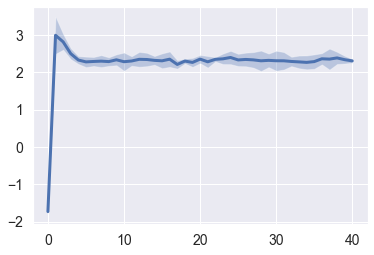

In [7]:
arr = np.loadtxt('some.txt')
#plt.plot(np.arange(arr.shape[0]), arr) #.mean())
plt.plot(np.arange(arr.shape[1]), arr.mean(0))
plt.fill_between(np.arange(arr.shape[1]), arr.mean(0)-1.96*arr.std(0), arr.mean(0)+1.96*arr.std(0), alpha=0.3)

In [11]:
feature = 'dumb'
feature = 'discriminator'
feature = 'cluster'
#feature = 'pca'
# feature = 'identity'
#feature = 'resnet34'
#feature = 'cluster_resnet34'

target = 'Discriminator'
#target = 'Prior'

# model = 'dcgan_test_0.01_0.1'
model = 'dcgan_v2_0.01'
#model = 'wgan_gp_0.001'
# model = 'sngan_ns_v1_0.01'
# model = 'sngan_ns_0.003'
#model = 'dcgan_0.01'
#model = 'dcgan_new_0.001'
#model = 'mlp_ring_v2_0.01'
#model = 'sngan_ns_0.01' #001'
# model = 'snresnet_0.01'
#model = 'studio_wgan_gp_0.001'

logdir = Path(ROOT_DIR, 'log', f'{feature}_feature_{target}Target')

In [12]:
logs = list(logdir.glob(model))

for gan_logpath in logs:
    # if 'test' in gan_logpath.stem:
    #     continue
    configs = list(gan_logpath.glob('*.yml'))
    config_path = configs[0] if configs[1].stem == 'gan_config' else configs[1]
    gan_config_path = configs[1] if configs[1].stem == 'gan_config' else configs[0]
    print(config_path.stem)

    Path(gan_logpath, 'figs').mkdir(exist_ok=True)
    #config_path = Path(gan_logpath, 'dcgan-dumb.yml')
    config = DotConfig(yaml.round_trip_load(config_path.open('r')))
    n_steps = config.n_steps
    every = config.every

    gan_config = DotConfig(yaml.round_trip_load(gan_config_path.open('r'))['gan_config'])

    arange = np.arange(0, n_steps + 1, every)
    #try:
    plot_res(gan_logpath, gan_config, arange)
    # except:
    #   print('fail')


dcgan-cluster
is failed
fid failed


<Figure size 432x288 with 0 Axes>

In [13]:
logs

[PosixPath('/home/lagutin/constrained_gen/maxent_gan/log/cluster_feature_DiscriminatorTarget/dcgan_v2_0.01')]

In [31]:
arange

array([   0,   25,   50,   75,  100,  125,  150,  175,  200,  225,  250,
        275,  300,  325,  350,  375,  400,  425,  450,  475,  500,  525,
        550,  575,  600,  625,  650,  675,  700,  725,  750,  775,  800,
        825,  850,  875,  900,  925,  950,  975, 1000])